# Programming Project 1 analysis using EDA tools

### Import Modules

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset and save it to a dataframe named 'df'
df=pd.read_csv('Individual Project 1.csv')

### Investigate your dataset using pandas modules and do the tasks. At the end the dataframe will be look like: 
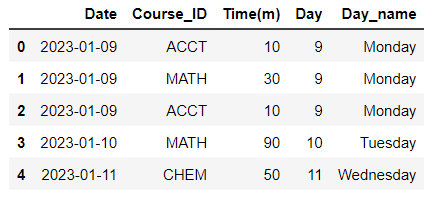

In [3]:
df.head()

,initials,date,course_id,time(m),summary
0,ED,1/9/2023,FINA-315,10,registered for textbook
1,ED,1/11/2023,FINA-315,12,reviewed syllabus for quiz
2,ED,1/11/2023,DS-160,16,finished and submitted in-class assignment
3,ED,1/11/2023,DS-160,2,organized binder
4,ED,1/11/2023,ECON-314,2,organized binder


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   initials   42 non-null     object
 1   date       42 non-null     object
 2   course_id  42 non-null     object
 3   time(m)    42 non-null     int64 
 4   summary    42 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.8+ KB


In [5]:
# Is there any column you want to drop? If yes which column and why?
print('The initials column is redundant in this dataset because all of the entries are mine; therefore, I will drop the column')
print('If this data was being combined with other students then it would be important to keep, but in this case it is not.')

df.drop('initials', axis=1, inplace=True)
df.head()

The initials column is redundant in this dataset because all of the entries are mine; therefore, I will drop the column
If this data was being combined with other students then it would be important to keep, but in this case it is not.


,date,course_id,time(m),summary
0,1/9/2023,FINA-315,10,registered for textbook
1,1/11/2023,FINA-315,12,reviewed syllabus for quiz
2,1/11/2023,DS-160,16,finished and submitted in-class assignment
3,1/11/2023,DS-160,2,organized binder
4,1/11/2023,ECON-314,2,organized binder


In [13]:
# Convert the date column to datetime

df['date']=pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       42 non-null     datetime64[ns]
 1   course_id  42 non-null     object        
 2   time(m)    42 non-null     int64         
 3   summary    42 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.4+ KB


In [14]:
# Calculate the day of the month and create a new column named 'Day'

df['Day']=df['date'].dt.day
df.head()

,date,course_id,time(m),summary,Day
0,2023-01-09,FINA-315,10,registered for textbook,9
1,2023-01-11,FINA-315,12,reviewed syllabus for quiz,11
2,2023-01-11,DS-160,16,finished and submitted in-class assignment,11
3,2023-01-11,DS-160,2,organized binder,11
4,2023-01-11,ECON-314,2,organized binder,11


In [16]:
# Create a new column called Day_name using  .dt.day_name()
df['Day_name']=df['date'].dt.day_name()
df.head()

,date,course_id,time(m),summary,Day,Day_name
0,2023-01-09,FINA-315,10,registered for textbook,9,Monday
1,2023-01-11,FINA-315,12,reviewed syllabus for quiz,11,Wednesday
2,2023-01-11,DS-160,16,finished and submitted in-class assignment,11,Wednesday
3,2023-01-11,DS-160,2,organized binder,11,Wednesday
4,2023-01-11,ECON-314,2,organized binder,11,Wednesday


### Answer the questions

In [39]:
# What is the average time you have spend for learning?
print("The average time spent in one sitting is", round(df['time(m)'].mean()), "minutes")
print('')
print(df.groupby('course_id').mean().round())
print('')
print('From the calcuation and chart above we see that the average time spent in a single sitting was 36 minutes.')
print('In the chart we see the average time spent learning by subject.')

The average time spent in one sitting is 36 minutes

           time(m)   Day
course_id               
ACCT-441      23.0  12.0
BUSA-301      39.0  13.0
DS-160        40.0  20.0
ECON-314      18.0  17.0
FINA-315      44.0  11.0

From the calcuation and chart above we see that the average time spent in a single sitting was 36 minutes.
In the chart we see the average time spent learning by subject.


In [51]:
# Display all of the entries where you have spent more than the average time to learn 

df.query('`time(m)`>36')

,date,course_id,time(m),summary,Day,Day_name
11,2023-01-15,FINA-315,45,Cengage homework,15,Sunday
13,2023-01-16,DS-160,81,Worked on IP2,16,Monday
15,2023-01-16,FINA-315,43,"Worked on GP, section 2 I, a & b",16,Monday
16,2023-01-18,FINA-315,40,"Worked on GP, section 2 I, a & b",18,Wednesday
18,2023-01-23,DS-160,60,Worked on IP2,23,Monday
20,2023-01-24,DS-160,40,Finished and submitted IP2,24,Tuesday
22,2023-01-28,DS-160,112,Worked on IP3,28,Saturday
24,2023-01-29,BUSA-301,60,Created team presentation slide,29,Sunday
27,2023-01-31,DS-160,45,Finished and submitted IP3,31,Tuesday
29,2023-02-04,FINA-315,75,Worked on study set for Exam #1,4,Saturday


In [56]:
# Which course you have spent the maximum time to prepare?

print(df.groupby('course_id').sum())
print('')
print('From the chart above we see that I have spent the maximum total amount of time doing work for my finance class, FINA-315.')

           time(m)  Day
course_id              
ACCT-441        92   49
BUSA-301       314  102
DS-160         478  241
ECON-314       111  100
FINA-315       522  127

From the chart above we see that I have spent the maximum total amount of time doing work for my finance class, FINA-315.


In [58]:
# Which day of the week you sepent most of the time?


print(df.groupby('Day_name').sum())
print('')

print(df['Day_name'].value_counts())
print('')
print('From the charts above we see that school work has most frequently occurred on Mondays; however, the most time doing')
print('schoolwork has been spent on Saturdays')

           time(m)  Day
Day_name               
Monday         391  198
Saturday       468  105
Sunday         435  123
Tuesday        130   62
Wednesday       93  131

Monday       11
Wednesday    10
Saturday      9
Sunday        9
Tuesday       3
Name: Day_name, dtype: int64

From the charts above we see that school work has most frequently occurred on Mondays; however, the most time doing
schoolwork has been spent on Saturdays


### Investigate the distribution of Time, adding the mean. How the data distributed?
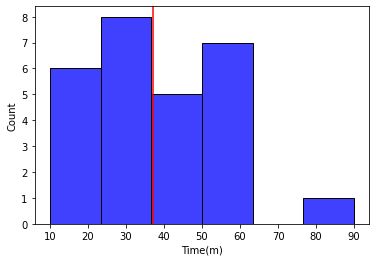

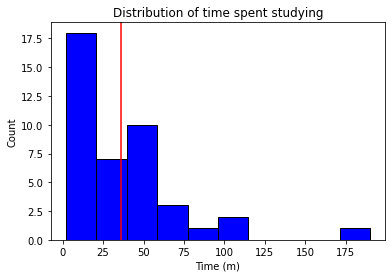


Based on this graph we can see that the data is left skewed with a high outlier


In [63]:
plt.hist(df['time(m)'],
        facecolor='blue',
        edgecolor='black')
plt.axvline(df['time(m)'].mean(), color='red')
plt.title("Distribution of time spent studying")
plt.xlabel("Time (m)")
plt.ylabel("Count")
plt.show()

print('')
print('Based on this graph we can see that the data is left skewed with a high outlier')

### Investigate Total time by Day using bar plot - Remove the Confidence Interval - By Course ID. Comment on your findings
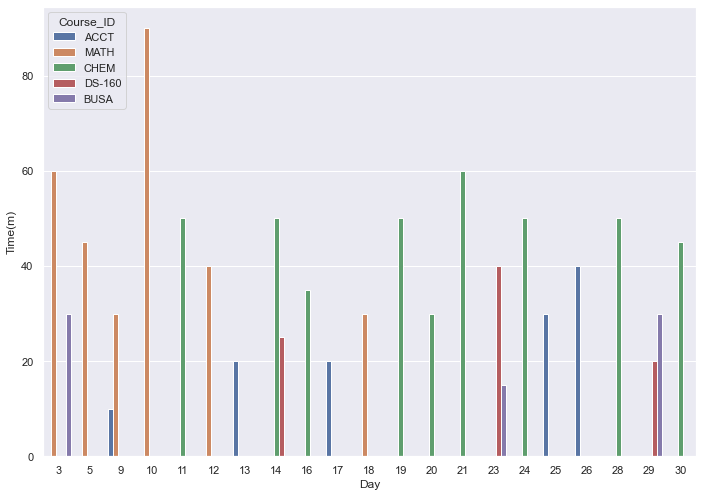


From the graph below we see that most days where time was spend studying, that time was primarily focused on 1 or 2 subjects
Only one day actually has time recorded for all five subjects.


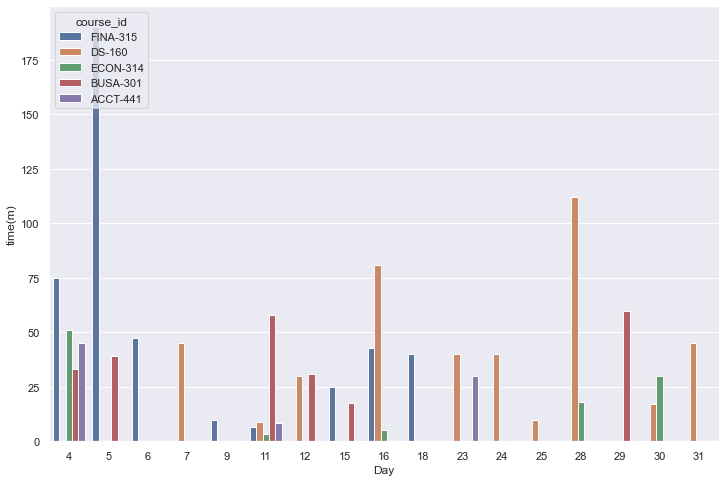

In [87]:
sns.set(rc={'figure.figsize':(12,8)})
bar_plot=sns.barplot(x='Day',
                    y='time(m)',
                    data=df,
                    ci=False,
                    hue='course_id')

print('')
print('From the graph below we see that most days where time was spend studying, that time was primarily focused on 1 or 2 subjects')
print('Only one day actually has time recorded for all five subjects.')

### Investigate the measure of dispersion (table and plot) of time column.
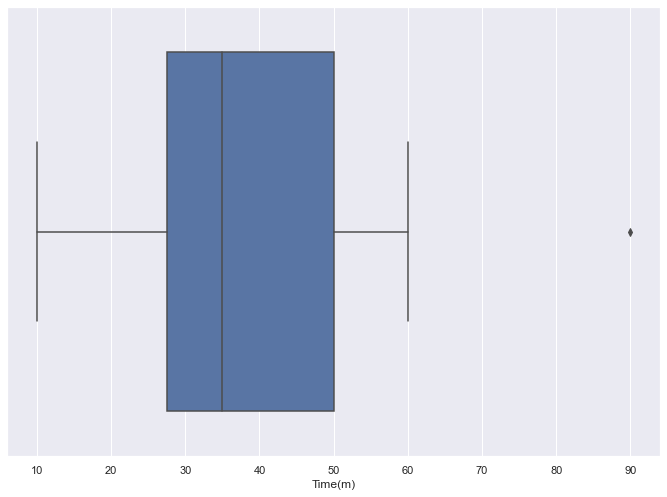

From this graph we see that the majority of my study sessions lasted between approximately 10 and 45 minutes
with the average falling around 30 minutes, and 3 major outliers noted.


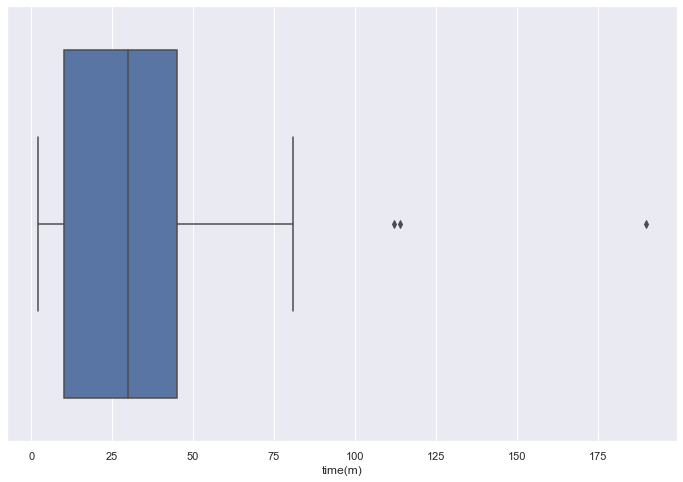

In [92]:
box_plot=sns.boxplot(x=df['time(m)'])
print('From this graph we see that the majority of my study sessions lasted between approximately 10 and 45 minutes')
print('with the average falling around 30 minutes, and 3 major outliers noted.')

### Investigate the the distribution of time by Day_name
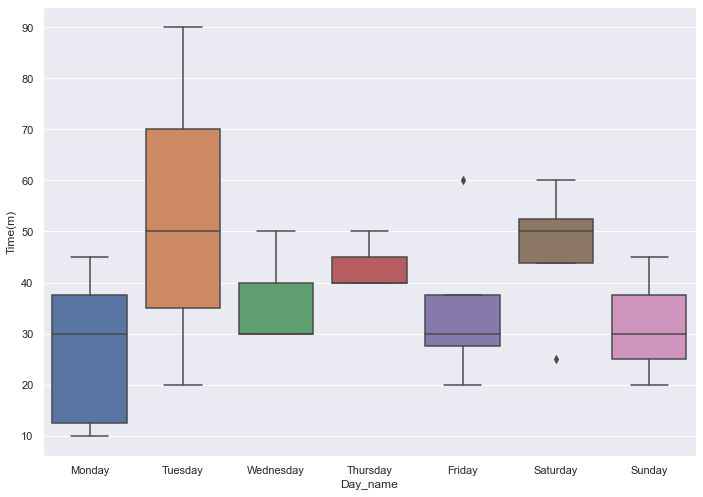

This graph clearly shows that the most time was spent on Saturday. The second highest amount of time was
spent on Monday, and the highest time spent in a single sitting was on a Sunday.


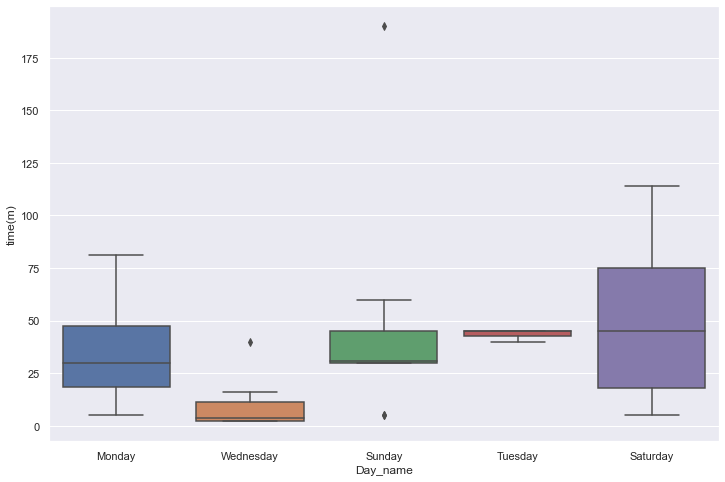

In [96]:
box_plot=sns.boxplot(x='Day_name',
                    y='time(m)',
                    data=df)
print('This graph clearly shows that the most time was spent on Saturday. The second highest amount of time was')
print('spent on Monday, and the highest time spent in a single sitting was on a Sunday.')

### Use lmplots to plot Day and Time , remove error bar, add hue and display by column
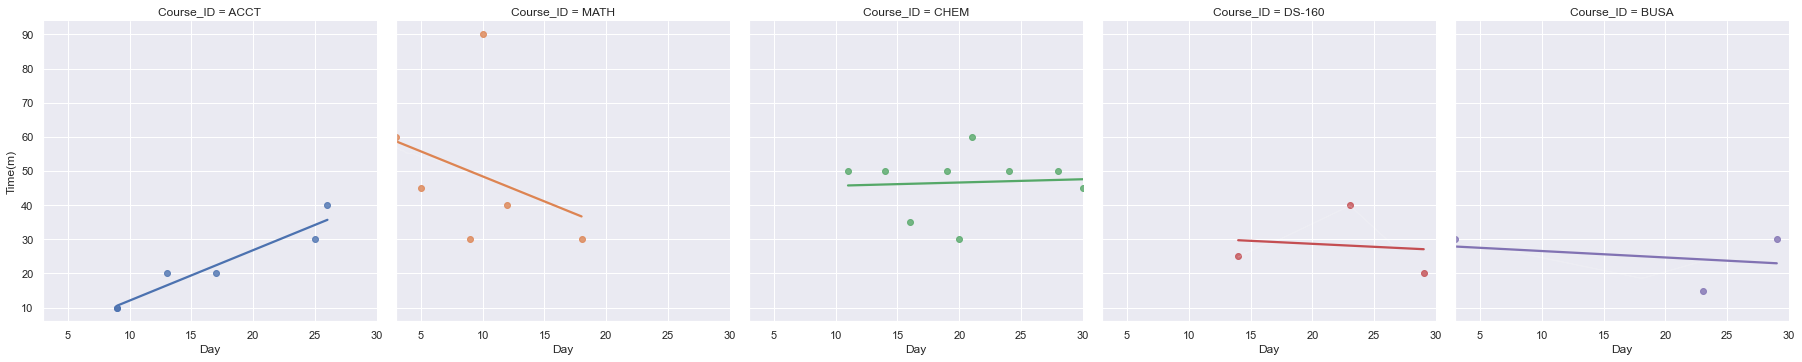

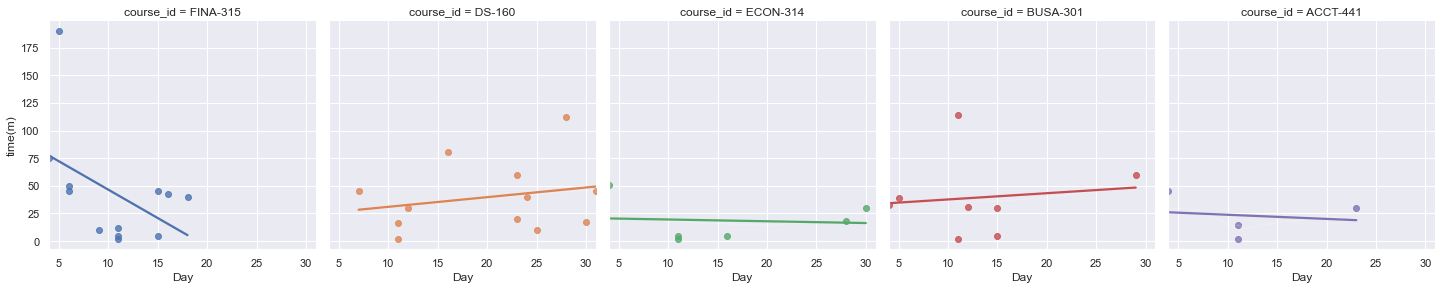

In [101]:
lm_plot=sns.lmplot(x='Day',
                  y='time(m)',
                  data=df,
                  hue='course_id',
                  ci=False,
                  col='course_id',
                  height=4)

### Create a pair plot of Day and Time and add course id as hue
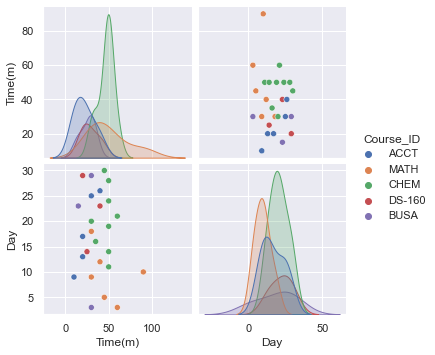

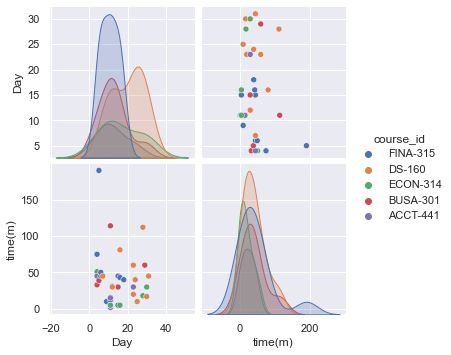

In [113]:
pair_plot=sns.pairplot(df[['Day', 'time(m)', 'course_id']], hue='course_id')

### Display the Heatmap and comment on your findings
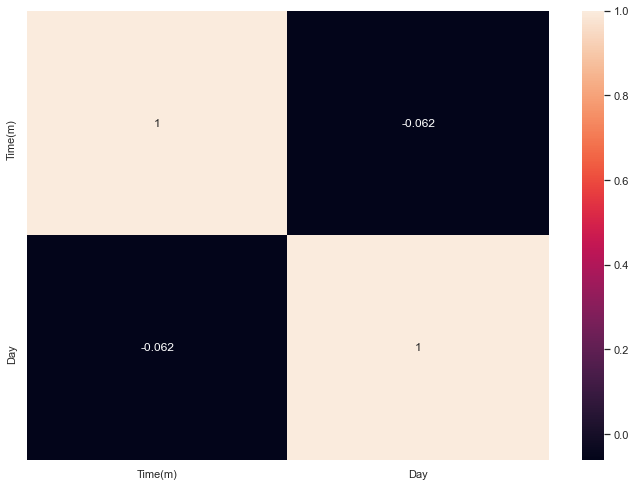

In [93]:
df.columns

Index(['date', 'course_id', 'time(m)', 'summary', 'Day', 'Day_name'], dtype='object')

              Day   time(m)
Day      1.000000 -0.061187
time(m) -0.061187  1.000000

This heat map shows that there is no significant correlation between the day and the time spent studying


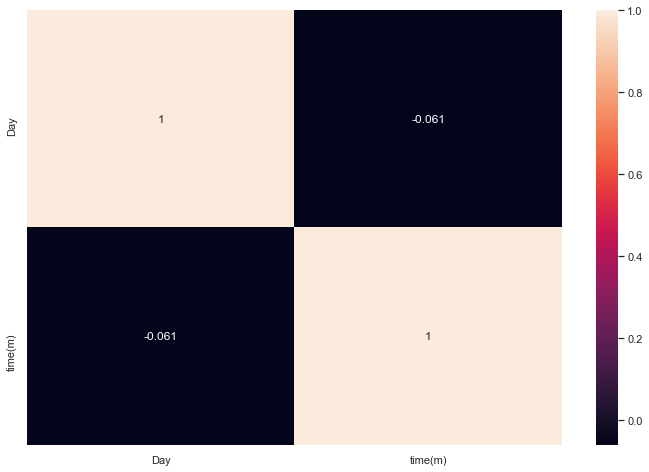

In [116]:
heat_map_corr=df[['Day', 'time(m)']].corr(method='pearson')
print(heat_map_corr)

cols=['Day','time(m)']
heat_map=sns.heatmap(heat_map_corr,
                    annot=True,
                    xticklabels=cols,
                    yticklabels=cols)

print('')
print("This heat map shows that there is no significant correlation between the day and the time spent studying")